# Project Description: 

### We have been given an Uber drives data set, which encompasses trips made by Uber drivers in 2016 along with purpose of the trip, starting point, ending point, distance covered in these trips and the category of trips. 

### I have conducted Exploratory Data Analysis on this data utilizing all variables possible, have made use of plots wherever deemed necessary

## Importing the required packages

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime

%matplotlib inline

# Importing Dataset

In [4]:
uber_data = pd.read_csv("uber_data_2016.csv")
uber_data.head()

uber_data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


# Data cleaning insight

1. We observe that the dataset has 1 extra row in the end which is the Total Row (summing up all values of the above columns ) which needs to be removed as it is a junk record, we have removed that extra record in the end 

In [5]:
# Point 1 
uber_data.drop(uber_data.tail(1).index,inplace=True) # drop last n rows
uber_data.tail()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Insights - Here we will do EDA on data to come up with insights about the trips

## 1. Which month had highest number of trips/miles covered? 

Text(0.5, 1.0, 'Trend of trips over months')

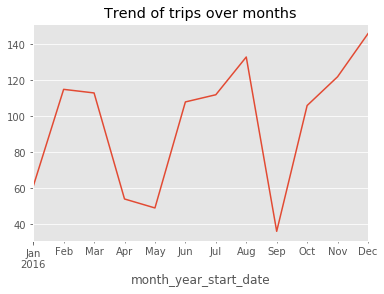

In [32]:
import pandas as pd
import numpy as np
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'])
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'])

uber_data['month_year_start_date'] = uber_data['START_DATE*'].dt.to_period('M')
uber_data['month_year_end_date'] = uber_data['END_DATE*'].dt.to_period('M')

#uber_data.

# Checking if month_year_start_date and month_year_end_date are the same, if they are we do not need to use both 
uber_data['Start_Score_diff'] = uber_data['month_year_start_date'] - uber_data['month_year_end_date'] 
uber_data.head()

uber_data_equal = uber_data[uber_data.month_year_start_date == uber_data.month_year_end_date]
cnt = uber_data_equal.count
#print(cnt)

# Since all of the trips are happening on the same day we can work with only one of the dates, let us work with the 
# start date 

#counts_by_month = uber_data['month_year_start_date'].value_counts().sort_values
#print(counts_by_month)

ax = uber_data.groupby('month_year_start_date')['START_DATE*'].count().plot(kind='line')
ax.set_title('Trend of trips over months')

# Now that we have counts of trips over months plot it into a line graph


## Insight 1: We can observe that the number of uber trips increase at a very fast rate during the winter months and during the summer months, but dip during spring and fall season.

## 2. We want to see if majority of trips start or end at the same location 

In [7]:
import matplotlib.pyplot as plt
start_date_location = uber_data.groupby('START*')['month_year_start_date'].count().sort_values(ascending = False)

end_date_location = uber_data.groupby('STOP*')['month_year_start_date'].count().sort_values(ascending = False)

print(start_date_location)

#print(end_date_location)

START*
Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
Durham                  37
Lahore                  36
Raleigh                 28
Kar?chi                 27
Apex                    17
Westpark Place          17
Berkeley                16
Midtown                 14
R?walpindi              11
Kissimmee               11
Kenner                  11
New Orleans             10
Emeryville              10
Downtown                 9
San Francisco            8
Edgehill Farms           8
Orlando                  8
Colombo                  8
Banner Elk               8
Central                  8
The Drag                 7
Oakland                  7
Hazelwood                7
Covington                6
Preston                  6
                      ... 
Marigny                  1
Mcvan                    1
Mebane                   1
Medical Centre           1
NOMA                     1
Meredith             

## Insight 2: Cary has the highest number of trips starting as well as ending = 201/1155 = 17.4% followed by Morrisville and Whitebridge. Cary is definitely a popular destination or might have a high population

## 3. We want to see which Purpose had the highest mean distance covered. We should also look at the number of trips for each category since we need enough samples in every category to make a sound judgement (good sample size)

In [8]:
import pandas as pd
count_by_purpose = uber_data.groupby('PURPOSE*')['month_year_start_date'].count().sort_values(ascending = False)
#print(count_by_purpose)

mean_by_purpose = uber_data.groupby('PURPOSE*')['MILES*'].mean().sort_values(ascending = False)
#print(mean_by_purpose)

x = pd.merge(mean_by_purpose, count_by_purpose, on='PURPOSE*', how='left')
print(x)

                     MILES*  month_year_start_date
PURPOSE*                                          
Commute          180.200000                      1
Customer Visit    20.688119                    101
Meeting           15.247594                    187
Charity ($)       15.100000                      1
Between Offices   10.944444                     18
Temporary Site    10.474000                     50
Meal/Entertain     5.698125                    160
Airport/Travel     5.500000                      3
Moving             4.550000                      4
Errand/Supplies    3.968750                    128


## Insight 3: As we can see Customer Visit, Meeting, Meal/Entertain, Errand have sufficient number of trips, to make a judgement on. Highest average distance travelled is for Customer Visit, followed by Meeting so we can say people use Uber more often for official trips than personal trips

## 4. What is the trend of Business vs Personal trips, This should reaffirm our 3rd insight. We are going to count the trips taken for Business and Personal overall, and also over months 

In [30]:
## import pandas as pd 
count_by_category = uber_data.groupby('CATEGORY*')['month_year_start_date'].count().sort_values(ascending = False)
#print(count_by_category)

#Plot trend of trips over months 

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

uber_data_business = uber_data[(uber_data['CATEGORY*']=='Business')]
count_row = uber_data_business.shape[0]  # gives number of row count
print(count_row)

# Now that we have dataset with just Business Trips let us plot that over time 

fig, ax = plt.subplots(figsize=(15,7))
uber_data_business.groupby(['month_year_start_date']).count()['month_year_end_date'].plot(ax=ax)

# Let us create dataset with Personal trips 

uber_data_personal = uber_data[(uber_data['CATEGORY*']=='Personal')]
count_row_personal = uber_data_personal.shape[0]  # gives number of row count

fig, ax = plt.subplots(figsize=(15,7))
uber_data_personal.groupby(['month_year_start_date']).count()['month_year_end_date'].plot(ax=ax)



1078
            START_DATE*           END_DATE* CATEGORY*            START*  \
85  2016-02-09 10:54:00 2016-02-09 11:07:00  Personal       Whitebridge   
86  2016-02-09 11:43:00 2016-02-09 11:50:00  Personal        Northwoods   
87  2016-02-09 13:36:00 2016-02-09 13:52:00  Personal        Tanglewood   
88  2016-02-09 13:58:00 2016-02-09 14:02:00  Personal           Preston   
102 2016-02-13 23:45:00 2016-02-14 00:01:00  Personal     East Elmhurst   
103 2016-02-14 00:50:00 2016-02-14 01:00:00  Personal   Jackson Heights   
129 2016-02-19 11:20:00 2016-02-19 11:26:00  Personal         Islamabad   
130 2016-02-19 11:45:00 2016-02-19 11:50:00  Personal         Islamabad   
134 2016-02-19 20:08:00 2016-02-19 20:30:00  Personal         Islamabad   
135 2016-02-19 20:34:00 2016-02-19 20:51:00  Personal  Unknown Location   
136 2016-02-20 07:59:00 2016-02-20 08:32:00  Personal  Unknown Location   
137 2016-02-20 10:48:00 2016-02-20 10:56:00  Personal         Islamabad   
138 2016-02-20 11:45

## Insight 4: First thing we notice is there is a wide gap between Business and Personal Trips (1078 vs 77) respectively. This might be due to incorrect / less capture of data. Business Trips are observed to be increasing over winters as compared to other months. No clear trend observed in Personal Trips due to only 6 months data being present 